In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





import warnings
warnings.simplefilter("ignore")

In [33]:
df = pd.read_excel("D:\ExcelR Data Science\Assignments\Clustering\EastWestAirlines.xlsx", sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
df=df.drop(['ID#','Award?'],axis=1)

In [35]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [36]:
df.shape

(3999, 10)

In [37]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
dtype: object

In [38]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [39]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


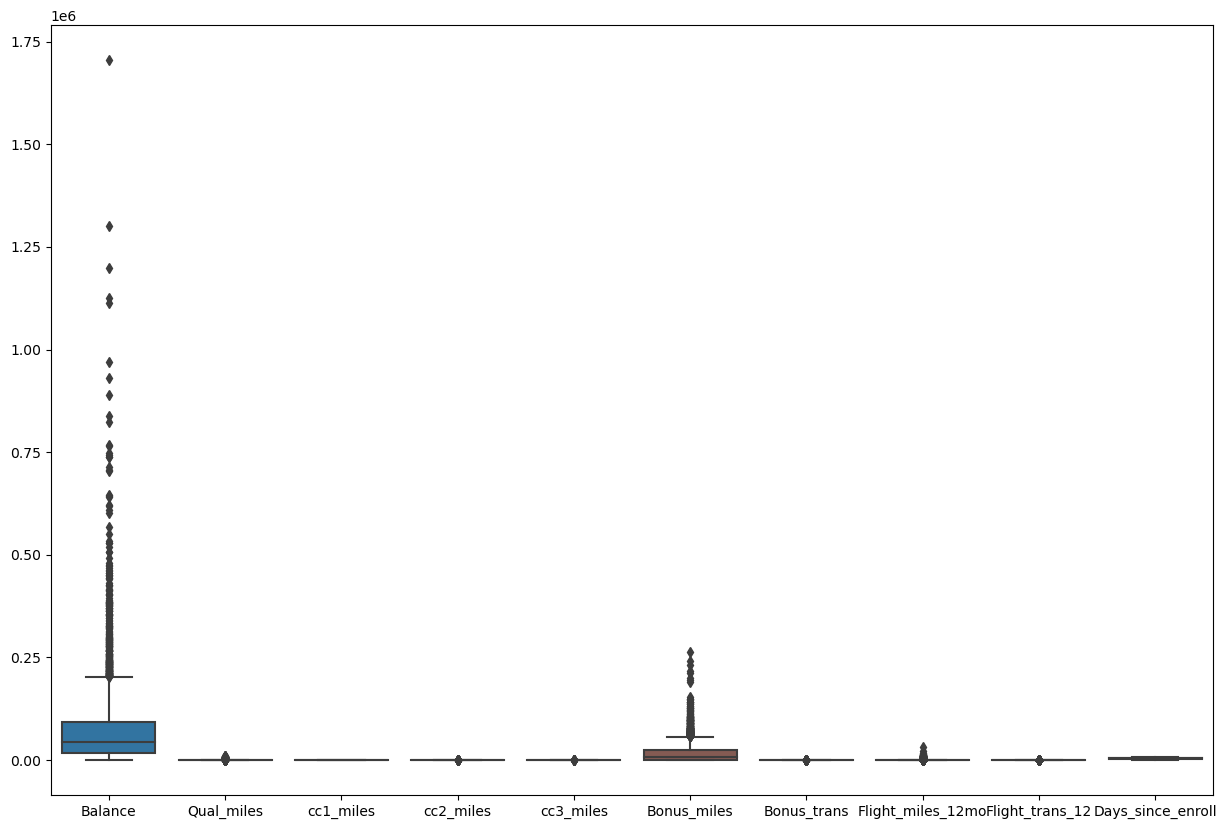

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [41]:
def remove_outliers(data):
     
    df = data.copy()
   
    for col in list(df.columns):
        
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
 
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
   
        return df

In [42]:
cleaned_data = remove_outliers(df)


In [43]:
#Normalizing Dataset

from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
df_scaled=sd.fit_transform(cleaned_data)

In [44]:
data=pd.DataFrame(df_scaled,columns=df.columns)

In [45]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.526340,-0.183689,-0.767032,-0.098566,-0.060929,-0.708790,-1.102910,-0.324736,-0.358284,1.407388
1,-0.642199,-0.183689,-0.767032,-0.098566,-0.060929,-0.707051,-0.998161,-0.324736,-0.358284,1.391841
2,-0.354342,-0.183689,-0.767032,-0.098566,-0.060929,-0.541233,-0.788663,-0.324736,-0.358284,1.423907
3,-0.700369,-0.183689,-0.767032,-0.098566,-0.060929,-0.694958,-1.102910,-0.324736,-0.358284,1.384067
4,0.379920,-0.183689,1.422205,-0.098566,-0.060929,1.121059,1.515815,1.170823,0.713600,1.375808


In [46]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(data)

In [47]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
data.insert(data.columns.get_loc("Balance"), "Cluster", clusters)

In [49]:
data.head()

,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,-0.526340,-0.183689,-0.767032,-0.098566,-0.060929,-0.708790,-1.102910,-0.324736,-0.358284,1.407388
1,0,-0.642199,-0.183689,-0.767032,-0.098566,-0.060929,-0.707051,-0.998161,-0.324736,-0.358284,1.391841
2,0,-0.354342,-0.183689,-0.767032,-0.098566,-0.060929,-0.541233,-0.788663,-0.324736,-0.358284,1.423907
3,0,-0.700369,-0.183689,-0.767032,-0.098566,-0.060929,-0.694958,-1.102910,-0.324736,-0.358284,1.384067
4,1,0.379920,-0.183689,1.422205,-0.098566,-0.060929,1.121059,1.515815,1.170823,0.713600,1.375808


In [50]:
data['Cluster'].unique()

array([0, 1, 2])

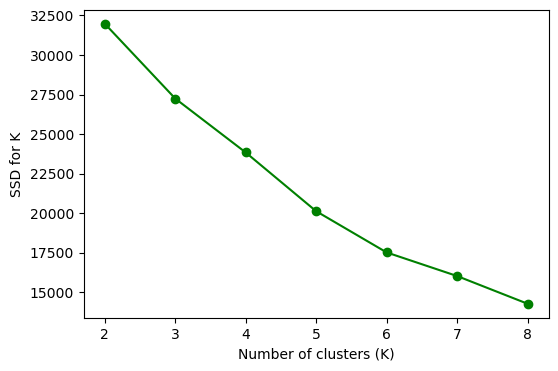

In [51]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [55]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5,max_iter=600, algorithm = 'auto')
cluster1 = kmeans_model.fit_predict(data)

In [57]:
data.insert(data.columns.get_loc("Balance"), "Cluster1", cluster1)

In [58]:
data.head()

,Cluster,Cluster1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,0,-0.526340,-0.183689,-0.767032,-0.098566,-0.060929,-0.708790,-1.102910,-0.324736,-0.358284,1.407388
1,0,0,-0.642199,-0.183689,-0.767032,-0.098566,-0.060929,-0.707051,-0.998161,-0.324736,-0.358284,1.391841
2,0,0,-0.354342,-0.183689,-0.767032,-0.098566,-0.060929,-0.541233,-0.788663,-0.324736,-0.358284,1.423907
3,0,0,-0.700369,-0.183689,-0.767032,-0.098566,-0.060929,-0.694958,-1.102910,-0.324736,-0.358284,1.384067
4,1,3,0.379920,-0.183689,1.422205,-0.098566,-0.060929,1.121059,1.515815,1.170823,0.713600,1.375808


In [60]:
# Get the cluster centroids
print(kmeans_model.cluster_centers_)
    


[[ 4.10782519e-15 -3.59517655e-01 -4.76589133e-02 -6.33349549e-01
  -9.85659316e-02 -5.87816661e-02 -5.36095182e-01 -5.17238403e-01
  -1.79981291e-01 -1.90897731e-01 -2.03991489e-01]
 [ 2.00000000e+00  1.02569777e+00  7.76549789e-01  6.43238919e-02
  -9.85659316e-02 -6.09287022e-02  5.97866513e-01  1.53172655e+00
   3.59676111e+00  3.81053151e+00  2.17125796e-01]
 [ 1.07142857e+00  3.47259159e-01 -7.42442215e-02  1.05733240e+00
  -9.85659316e-02  1.61021125e+01  3.42055526e+00  1.64301052e+00
  -4.44282347e-02 -3.28905536e-02  2.33655513e-01]
 [ 1.00000000e+00  5.46353981e-01  1.34573584e-03  1.19049565e+00
  -9.85659316e-02 -5.28760847e-02  8.99473909e-01  7.46507239e-01
  -9.99296510e-02 -1.09995570e-01  3.55938421e-01]
 [ 2.32558140e-01  3.98238598e-03 -1.53542508e-01 -6.65207076e-01
   9.00846771e+00 -6.09287022e-02 -9.28788166e-02  6.29102848e-01
   9.47892801e-02  2.33745095e-01 -6.52425577e-02]]
